# 1. Occultation Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import math
import re
from pykml import parser

In [2]:
%run elevations.ipynb

ELEVATION_FUNCTION = get_elevation_SRTM3

48
-----------
656
-----------
490
-----------
63
-----------
4178
-----------
2502
-----------
341
-----------
225
-----------


Edit the following lines to point to the correct locations of the occultation header and occultation csv files.

In [18]:
OCCULTATIONS_PATH = "occultations/"
EVENTS_PATH = OCCULTATIONS_PATH + "events/"

OCCULTATIONS_2023_02_18 = OCCULTATIONS_PATH + "occultation-2023-02-18.csv"
OCCULTATIONS_HEADER = OCCULTATIONS_PATH + "occultation-header.txt"

To make the code more readable, the header needs to be added to the dataframe for the csv file (as they are not part of the file by default). The following lines of code add a header to any occultation data csv file. 

In [36]:
def add_occultation_header(filename):
    occ_dataframe = pd.read_csv(filename, header = None)
    column_headers = []
    with open(OCCULTATIONS_HEADER) as file_lines:
        for line in file_lines.readlines():
            column_headers.append(line.split()[1])
    occ_dataframe.columns = column_headers
    return occ_dataframe

add_occultation_header(OCCULTATIONS_2023_02_18)

id   julian_date  TT_UTC              occDate obj_number   obj_name  \
0   110197  2.459993e+06  69.184  2023-02-17 00:35:56     119951   2002KX14   
1   109988  2.459993e+06  69.184  2023-02-17 01:56:57      60558   Echeclus   
2   111916  2.459993e+06  69.184  2023-02-17 04:13:20     523713   2014JX80   
3   109935  2.459993e+06  69.184  2023-02-17 04:17:57      10199   Chariklo   
4   118079  2.459993e+06  69.184  2023-02-17 06:10:13       1173   Anchises   
5   118992  2.459993e+06  69.184  2023-02-17 06:12:49       2363  Cebriones   
6   119043  2.459993e+06  69.184  2023-02-17 06:34:49      16560     Daitor   
7   118781  2.459993e+06  69.184  2023-02-17 06:42:26       1871   Astyanax   
8   112615  2.459993e+06  69.184  2023-02-17 08:43:59      50000     Quaoar   
9   118782  2.459993e+06  69.184  2023-02-17 09:56:29       1871   Astyanax   
10  118783  2.459993e+06  69.184  2023-02-17 10:06:55       1871   Astyanax   
11  111600  2.459993e+06  69.184  2023-02-17 10:51:27     574372  2010JO179   
12  109398  2.459993e+06  69.184  2023-02-17 10:52:08      95626   2002GZ32   
13  112225  2.459993e+06  69.184  2023-02-17 11:43:37      38628       Huya   
14  117856  2.459993e+06  69.184  2023-02-17 13:56:19       2241  Alcathous   
15  118784  2.459993e+06  69.184  2023-02-17 15:57:19       1871   Astyanax   
16  119911  2.459993e+06  69.184  2023-02-17 15:57:58       3793   Leonteus   
17  111489  2.459993e+06  69.184  2023-02-17 16:15:22   2010FX86   2010FX86   
18  117857  2.459993e+06  69.184  2023-02-17 18:11:43       2241  Alcathous   
19  118785  2.459993e+06  69.184  2023-02-17 21:08:37       1871   Astyanax   
20  121239  2.459993e+06  69.184  2023-02-17 21:46:18        617  Patroclus   
21  109399  2.459993e+06  69.184  2023-02-17 22:55:01      95626   2002GZ32   
22  112111  2.459993e+06  69.184  2023-02-17 23:05:17      15810      Arawn   

      idspk  typ  radius1  radius2  ...  sun_bessel_y  sun_bessel_z  \
0   2119951  tno    227.5        0  ...     -0.020426      0.484433   
1   2060558  cen     43.5        0  ...      0.014989     -0.710498   
2   2523713  tno    127.5        0  ...     -0.235981      0.416436   
3   2010199  cen    124.0        0  ...      0.028215      0.948427   
4   2001173  tro     49.5        0  ...      0.092750      0.807277   
5   2002363  tro     48.5        0  ...     -0.410537      0.909400   
6   2016560  tro     21.5        0  ...      0.168340      0.985334   
7   2001871  tro     14.0        0  ...      0.011850      0.763002   
8   2050000  tno    555.0        0  ...     -0.043918      0.634314   
9   2001871  tro     14.0        0  ...      0.012271      0.761797   
10  2001871  tro     14.0        0  ...      0.012294      0.761732   
11  2574372  tno    351.0        0  ...     -0.244370      0.214874   
12  2095626  cen    118.5        0  ...      0.049535      0.708166   
13  2038628  tno    229.0        0  ...     -0.161676      0.361859   
14  2002241  tro     57.5        0  ...     -0.081117      0.950185   
15  2001871  tro     14.0        0  ...      0.013055      0.759549   
16  2003793  tro     56.0        0  ...     -0.201130     -0.181448   
17  3515022  tno    254.5        0  ...     -0.346314     -0.068883   
18  2002241  tro     57.5        0  ...     -0.080373      0.949531   
19  2001871  tro     14.0        0  ...      0.013732      0.757602   
20  2000617  tro     70.0        0  ...      0.385429      0.863470   
21  2095626  cen    118.5        0  ...      0.050428      0.702215   
22  2015810  tno     64.0        0  ...      0.074090      0.847694   

    moon_bessel_x  moon_bessel_y  moon_bessel_z  \
0        0.274678      -0.086813       0.957609   
1        0.053050      -0.156758      -0.986211   
2        0.315478      -0.512032       0.798935   
3       -0.368580      -0.239757       0.898146   
4        0.015871      -0.082142       0.996494   
5       -0.659221      -0.609150       0.440867   
6       -0.582893      -0.147779       0.798997  

In [4]:
data = np.array(pd.read_csv(OCCULTATIONS_2023_02_18, header = None))

print("Name: " + "Coordinates and Velocity")

for i in range(np.shape(data)[0]):
    # print(data[i][80], data[i][81])
    print(data[i][5] + ": " + str(data[i][30]) + ", " + str(data[i][31]) + ", " + str(data[i][32]) \
         + ", " + str(data[i][33]) + ", " + str(data[i][15]) + "\n" + str(data[i][45]) + ", " + str(data[i][46]))

Name: Coordinates and Velocity
2002KX14: -0.02719191026, -1.127976753841, 266.634785995771, -6.467209553448, 23.109299268984
266.428088220275, -23.543856243802
Echeclus: -0.204377360903, -0.914599788732, -190.715917405152, 42.638218910016, 6.030607045767
103.942686864174, 18.556858084317
2014JX80: -0.507159482095, 0.835265587324, 275.282498938246, 167.163718493548, 10.725563289347
266.145204733505, 3.337165663677
Chariklo: 0.289399238813, -0.771143510771, 446.153118094077, 167.408086612126, 7.04991661811
311.236779184143, -14.572995770931
Anchises: -0.059779086936, 0.282139620568, 516.914473121181, 108.604383674521, 2.538963789254
293.555719526343, -21.594596717191
Cebriones: -0.139542196602, 0.595376988461, 558.689148978167, 131.168759141844, 2.289655683192
334.072419767412, 12.096347458675
Daitor: -0.161085557164, 0.553416195933, 564.857142092098, 164.153117022069, 0.990248359903
328.538632342254, -21.867106999511
Astyanax: 0.039065241123, -0.286548931215, 490.916858630511, 67.522670

In [5]:
# Code to print the locations of the planets in the Besselian plane 

DAY_TO_SECONDS = 86400

def generate_n_besselian_coordinates(num_coords, duration, x0, y0, vx, vy):
    '''
    num_coords, the number of coordinates to output
    x0, y0 represent the besselian coordinates of the object
    vx, vy represent the derivatives of position with respect 
    to x and y in terms of Earth radius/day
    duration is the amount of time in seconds the occultation takes
    '''
    vx_seconds = vx / DAY_TO_SECONDS
    vy_seconds = vy / DAY_TO_SECONDS
    interval = duration / (num_coords - 1) if num_coords != 1 else 0
    positions = []
    # previously num_coords
    for i in range(num_coords):
        xcurr = x0 + vx_seconds * interval * i
        ycurr = y0 + vy_seconds * interval * i
        positions.append([xcurr, ycurr])
    return np.array(positions)

In [6]:
# Idea to obtain the earth coordinates is the following:
# given coordinates x,y in besselian plane the actual coordinate 
# on earth w.r.t the besselian plane should be (x,y,sqrt(1-x^2-y^2)) 
# because units of x and y are in earth radius

# Once given these coordinates, use iauGc2gde to convert them
# to latitude longitude w.r.t besselian plane and adjust the angles
# by the RA, DEC of the occulted star
# CHECK WHICH RA/DEC TO USE 

# Does note take the rotation of Earth into account, but this likely 
# should not matter since the occultations occur in less than a minute. 
# Could not find a function in SOFA that does this automatically. 

# TODO: Use a SOFA function to convert the RA/DEC of the star to 
# geocentric latitude longitude at a given epoch.
# Questions: Epoch for all these observations is 2016? 
# Does Epoch matter for converting RA/DEC of the star to geocentric
# lat/long since these events occur for such short periods of time? 

# Analyze Echeclus:
# index of the object we want to analyze in the CSV occultation file
body_index = 1

generate_n_besselian_coordinates(25, data[body_index][15], data[body_index][30], data[body_index][31], \
                                 data[body_index][32], data[body_index][33])

array([[-0.20437736, -0.91459979],
       [-0.20493202, -0.91447578],
       [-0.20548667, -0.91435178],
       [-0.20604133, -0.91422778],
       [-0.20659598, -0.91410377],
       [-0.20715064, -0.91397977],
       [-0.20770529, -0.91385577],
       [-0.20825995, -0.91373176],
       [-0.2088146 , -0.91360776],
       [-0.20936926, -0.91348375],
       [-0.20992391, -0.91335975],
       [-0.21047857, -0.91323575],
       [-0.21103322, -0.91311174],
       [-0.21158788, -0.91298774],
       [-0.21214253, -0.91286374],
       [-0.21269719, -0.91273973],
       [-0.21325184, -0.91261573],
       [-0.2138065 , -0.91249172],
       [-0.21436115, -0.91236772],
       [-0.21491581, -0.91224372],
       [-0.21547046, -0.91211971],
       [-0.21602512, -0.91199571],
       [-0.21657977, -0.9118717 ],
       [-0.21713443, -0.9117477 ],
       [-0.21768908, -0.9116237 ]])

In [7]:
# parse the KML file
with open('Chariklo_20230406_NIMAv20_LuckyStar.kmz', 'rb') as f:
    kml_data = f.read()
root = parser.fromstring(kml_data)

placemarks = root.Document.Placemark

# access elements in the KML file
# placemarks = root.Placemark
for placemark in placemarks:
    name = placemark.name.text
    coordinates = placemark.LineString.coordinates.text
    print(f"{name}: {coordinates}")

FileNotFoundError: [Errno 2] No such file or directory: 'Chariklo_20230406_NIMAv20_LuckyStar.kmz'

In [8]:
from ctypes import *

sofa = cdll.LoadLibrary('./sofa_utils')

DD2R = np.pi / 180
EARTH_EQUATORIAL_RADIUS = 1.00 # 6378.137e3 (normalized units )
EARTH_FLATTENING = 0.003352810665

def _init_carray_double(n):
    return (c_double * n)(*np.longdouble(n * [0.0]))

def _carray_to_numpy(array, n):
    arr = []
    for i in range(n):
        arr.append(array[i])
    return np.longdouble(arr)

# Both rotation_fotran and sofa.rotation agree on inputs 

def rotation_fortran(X, axe, theta):
    # X is 3D vector, axe = 0, 1, 2 is rotation axis and theta = angle
    cos_th = np.cos(theta)
    sin_th = np.sin(theta)
    Y = np.copy(X)
    ic1 = (axe + 1) % 3
    ic2 = (axe + 2) % 3
    Y[ic1] = cos_th * X[ic1] + sin_th * X[ic2]
    Y[ic2] = -sin_th * X[ic1] + cos_th * X[ic2]
    return Y

In [9]:
# This version of the code assumes that loo, lao, 
# lon, lat are all provided in radians

def orthoproj(loo, lao, lon, lat):
    xyz = _init_carray_double(3)
#     status = sofa.iau_gd2gce(c_double(EARTH_EQUATORIAL_RADIUS), c_double(EARTH_FLATTENING), \
#                              c_double(lon), c_double(lat), c_double(0), xyz)
    
    status = sofa.iau_gd2gce(c_double(EARTH_EQUATORIAL_RADIUS), c_double(EARTH_FLATTENING), \
                             c_double(lon), c_double(lat), \
                             c_double(ELEVATION_FUNCTION(lon * DD2R, lat * DD2R)), 
                             xyz)
    
    xyz = _carray_to_numpy(xyz, 3)
    
    if status != 0:
        return 'alert', lon, lat

    U = rotation_fortran(xyz, 2, loo)
    V = rotation_fortran(U, 1, -lao)
    
    bessel_coords = [V[1], V[2], V[0]]
    cc = V[0]
    
    th = np.pi / 2 - lao
    thp = np.arctan(np.tan(th) * (EARTH_EQUATORIAL_RADIUS - EARTH_FLATTENING) ** 2)
    bb = np.pi / 2 - lao - thp
    bb = -bb
    
    if cc < xyz[1] * np.tan(bb):
        fg = 0
    else:
        fg = 1    
    return bessel_coords, fg, status

In [10]:
# This version of the code assumes that loo, lao, 
# are all provided in radians, and that x, y are 
# expressed in terms of earth radius

def orthoprojinv(loo, lao, x, y):
    b2 = EARTH_EQUATORIAL_RADIUS + (EARTH_FLATTENING ** 2 - 2 * EARTH_FLATTENING) * (np.cos(lao) ** 2)
    r2 = np.sqrt(x ** 2 + y ** 2 / b2)
    
    if r2 > EARTH_EQUATORIAL_RADIUS:
        print('not on Earth')
        lon = 0
        lat = 100 # keep in degrees. 
        fg = 0
        return lon, lat, fg
    
    else:
        fg = 1
        cc = np.sqrt(EARTH_EQUATORIAL_RADIUS - x ** 2 - y ** 2) 
        V = [cc, x, y]    
        
        U = rotation_fortran(V, 1, lao)
        xyz = rotation_fortran(U, 2, -loo)
                        
        lon = c_double(0.0)
        lat = c_double(0.0)
        hh = c_double(0.0)
        
        sofa.iau_gc2gde(c_double(EARTH_EQUATORIAL_RADIUS), c_double(EARTH_FLATTENING), \
                        (c_double * 3)(*xyz), byref(lon), byref(lat), byref(hh))
        i = 0
        
        hh0 = ELEVATION_FUNCTION(lon.value * DD2R, lat.value * DD2R)
        
        while True:
            i = i + 1
            if i == 1000:
                print('i1000 orthoprojinv') 
                break
            converted_coords, fg, _status = orthoproj(loo, lao, lon.value, lat.value);
            
            V = [converted_coords[2], x, y]
                        
            U = rotation_fortran(V, 1, lao)
            xyz = rotation_fortran(U, 2, -loo)
                        
            sofa.iau_gc2gde(c_double(EARTH_EQUATORIAL_RADIUS), c_double(EARTH_FLATTENING), \
                            (c_double * 3)(*xyz), byref(lon), byref(lat), byref(hh))
                        
            if (abs(hh.value - hh0) < 1e-8 or i > 1000):
                break
        return lon.value / DD2R, lat.value / DD2R, fg

w = 2 * np.pi / (86164 / 86400) # radians/day
dt = 0.03 # day
    
def apply_orthoprojinv(coordinates, loo, lao):
    loo = loo * DD2R - w * dt
    lao = lao * DD2R
    
    transformed_coords = []
    
    for coord in coordinates:
        loo = loo + 2 * w * dt / len(coordinates)
        transformed_coords.append(orthoprojinv(loo, lao, coord[0], coord[1])[:2])
    return transformed_coords        

In [11]:
def coordGM(x0, y0, xp, yp, ADs, rapp, step, off, tmin, tmax):
    lo00 = ADs[0]
    la00 = ADs[1]
    cooGM = []
    t = tmin
    w = 2 * np.pi / (86164 / 86400) # radians/day
    v = np.sqrt(xp ** 2 + yp ** 2)
    dx = -off * yp / v * rapp
    dy = off * xp / v * rapp
    
    while t <= tmax:
        x = x0 + xp * t + dx
        y = y0 + yp * t + dy
                
        lo0 = lo00 - w * t
        la0 = la00
        lon, lat, fg = orthoprojinv(lo0, la0, x, y)
        if fg == 1:
            cooGM.append([lon, lat, 0, t])
        t += step / (DAY_TO_SECONDS * EARTH_EQUATORIAL_RADIUS)
    
    return np.longdouble(cooGM)

In [12]:
# units are in degrees
def gd2besselian(lon, lat, height, ra, dec, gst):
    geocentric_coords = _init_carray_double(3)
    sofa.iau_gd2gce(c_double(EARTH_EQUATORIAL_RADIUS), c_double(EARTH_FLATTENING), \
                             c_double(lon * DD2R), c_double(lat * DD2R), \
                             c_double(0), \
                             geocentric_coords)
    gha = gst - ra
    besselian_coords = _init_carray_double(3)
    
#     besselian_coords = rotation_fortran(geocentric_coords, 2, np.pi / 2 - gha * DD2R)
#     besselian_coords = rotation_fortran(besselian_coords, 0, np.pi / 2 - dec * DD2R)
    
    sofa.rotation(geocentric_coords, c_int(2), c_double(np.pi / 2 - gha * DD2R), besselian_coords) 
    sofa.rotation(besselian_coords, c_int(0), c_double(np.pi / 2 - dec * DD2R), besselian_coords)
    
    return _carray_to_numpy(besselian_coords, 3)
#     return besselian_coords

def besselian2gd(x, y, ra, dec, gst):
    gha = gst - ra
    besselian_coords = (c_double * 3)(*[x, y, np.sqrt(1 - x ** 2 - y ** 2)])
    geocentric_coords = _init_carray_double(3)
    
#     geocentric_coords = rotation_fortran(besselian_coords, 0, - np.pi / 2 + dec * DD2R)
#     geocentric_coords = rotation_fortran(geocentric_coords, 2, - np.pi / 2 + gha * DD2R)
        
    sofa.rotation(besselian_coords, c_int(0), c_double(- np.pi / 2 + dec * DD2R), geocentric_coords)
    sofa.rotation(geocentric_coords, c_int(2), c_double(- np.pi / 2 + gha * DD2R), geocentric_coords) 
    
    lon = c_double(0.0)
    lat = c_double(0.0)
    hh = c_double(0.0)
    
    sofa.iau_gc2gde(c_double(EARTH_EQUATORIAL_RADIUS), c_double(EARTH_FLATTENING), \
                            (c_double * 3)(*geocentric_coords), byref(lon), byref(lat), byref(hh))
    
    return lon.value / DD2R, lat.value / DD2R, hh.value

def apply_besselian2gd(coordinates, ra, dec, gst):
    return np.apply_along_axis(lambda coord: besselian2gd(coord[0], coord[1], ra, dec, gst)[:2], 1, coordinates)

In [13]:
body_index = 1

lon = data[body_index][80]
lat = data[body_index][81]
height = 0

ra = data[body_index][20]
dec = data[body_index][21]
gst = data[body_index][82]

x0 = data[body_index][30]
y0 = data[body_index][31]
vx = data[body_index][32]
vy = data[body_index][33]

num_coords = 100
duration = data[body_index][15]

plane_coordinates = generate_n_besselian_coordinates(num_coords, 70, x0, y0, vx, vy)
# print(plane_coordinates)
# print(x0, y0, vx / DAY_TO_SECONDS, vy / DAY_TO_SECONDS)

# print(gd2besselian(lon, lat, height, ra, dec, gst))

# print(besselian2gd(0, 0, ra, dec, gst))
# print(lon, lat)

# earth_coords = apply_orthoprojinv(plane_coordinates, lon, lat)
# earth_coords = apply_besselian2gd(plane_coordinates, ra, dec, gst)

# print(apply_besselian2gd(plane_coordinates, ra, dec, gst))
# print(earth_coords)

rapp = data[body_index][8] / 6378.137
tmin = data[body_index][16] / 1440
tmax = data[body_index][17] / 1440

# TESTING DATA
# x0 = -0.321265657771 
# y0 = 0.462153365648
# xp = 72.289061157231
# yp = 50.252836750566
# lon = 41.882723952758
# lat = 29.241911761118
# rapp = 32 / 6378.137
# tmin = -13.514429479837
# tmax = 13.520480543375

earth_coords = coordGM(x0, y0, vx, vy, [lon * DD2R, lat * DD2R, 0], rapp, 0.5, 0, tmin, tmax)
earth_coords_edge1 = coordGM(x0, y0, vx, vy, [lon * DD2R, lat * DD2R, 0], rapp, 0.5, 1, tmin, tmax)
earth_coords_edge2 = coordGM(x0, y0, vx, vy, [lon * DD2R, lat * DD2R, 0], rapp, 0.5, -1, tmin, tmax)
# print(earth_coords)

not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 or

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
i1000 orthoprojinv
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
not on Earth
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


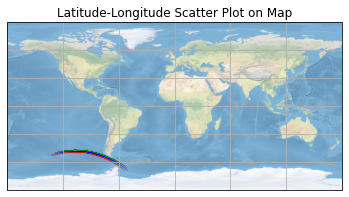

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create example data
latitudes = earth_coords[:, 1]
longitudes = earth_coords[:, 0]

latitudes_1 = earth_coords_edge1[:, 1]
longitudes_1 = earth_coords_edge1[:, 0]

latitudes_2 = earth_coords_edge2[:, 1]
longitudes_2 = earth_coords_edge2[:, 0]

# Create map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map elements
# ax.coastlines()
ax.stock_img()
ax.gridlines()

# Plot data on map
ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree(),
           marker='.', color='blue', alpha=0.5, s = 0.05)
ax.scatter(longitudes_1, latitudes_1, transform=ccrs.PlateCarree(),
           marker='.', color='red', alpha=0.5, s = 0.05)
ax.scatter(longitudes_2, latitudes_2, transform=ccrs.PlateCarree(),
           marker='.', color='green', alpha=0.5, s = 0.05)

# Set plot title
plt.title('Latitude-Longitude Scatter Plot on Map')
plt.savefig('my_map.png', dpi=1200, bbox_inches='tight', pad_inches=0.0, transparent=True)
# Display map
plt.show()


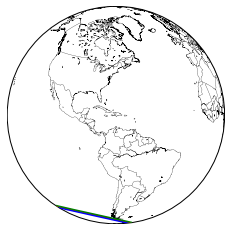

In [15]:
from mpl_toolkits.basemap import Basemap

# Sample latitude and longitude coordinates
latitudes = [x[1] for x in earth_coords ]
longitudes = [x[0] for x in earth_coords]

# Create a new Basemap plot
m = Basemap(projection='ortho', lat_0= lat, lon_0 = lon, resolution='l')

# Draw the coastlines and countries
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)

# Plot the coordinates as red dots
x, y = m(longitudes, latitudes)
m.plot(x, y, 'r', markersize=1)


x, y = m(longitudes_1, latitudes_1)
m.plot(x, y, 'b', markersize=1)

x, y = m(longitudes_2, latitudes_2)
m.plot(x, y, 'g', markersize=1)

# Display the plot
plt.show()